In [8]:
pip install baostock -i https://pypi.tuna.tsinghua.edu.cn/simple/ --trusted-host pypi.tuna.tsinghua.edu.cn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/
Note: you may need to restart the kernel to use updated packages.


In [9]:
import baostock as bs
import pandas as pd

#### 登陆系统 ####
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)

#### 获取沪深A股历史K线数据 ####
# 详细指标参数，参见“历史行情指标参数”章节；“分钟线”参数与“日线”参数不同。“分钟线”不包含指数。
# 分钟线指标：date,time,code,open,high,low,close,volume,amount,adjustflag
# 周月线指标：date,code,open,high,low,close,volume,amount,adjustflag,turn,pctChg
rs = bs.query_history_k_data_plus("sz.399997",
    "date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,isST",
    start_date='2020-01-01', end_date='2023-02-15',
    frequency="d", adjustflag="3")
print('query_history_k_data_plus respond error_code:'+rs.error_code)
print('query_history_k_data_plus respond  error_msg:'+rs.error_msg)

#### 打印结果集 ####
data_list = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    data_list.append(rs.get_row_data())
result = pd.DataFrame(data_list, columns=rs.fields)

#### 结果集输出到csv文件 ####   
result.to_csv("history_A_stock_k_data.csv", index=False)
print(result)

#### 登出系统 ####
bs.logout()

login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
           date       code        open        high         low       close  \
0    2020-01-02  sz.399997   8301.0880   8389.5750   8200.7240   8315.0160   
1    2020-01-03  sz.399997   8298.4330   8323.8260   8185.6940   8219.7300   
2    2020-01-06  sz.399997   8181.2270   8242.8550   8103.2620   8150.7970   
3    2020-01-07  sz.399997   8153.9880   8253.9260   8147.8590   8241.0400   
4    2020-01-08  sz.399997   8214.3220   8293.7660   8194.4230   8254.5330   
..          ...        ...         ...         ...         ...         ...   
750  2023-02-09  sz.399997  16279.6101  16862.2331  16270.0593  16816.4758   
751  2023-02-10  sz.399997  16798.0123  17027.7153  16714.3475  16893.3161   
752  2023-02-13  sz.399997  16857.8915  17756.0908  16857.8915  17550.3352   
753  2023-02-14  sz.399997  17547.6530  17751

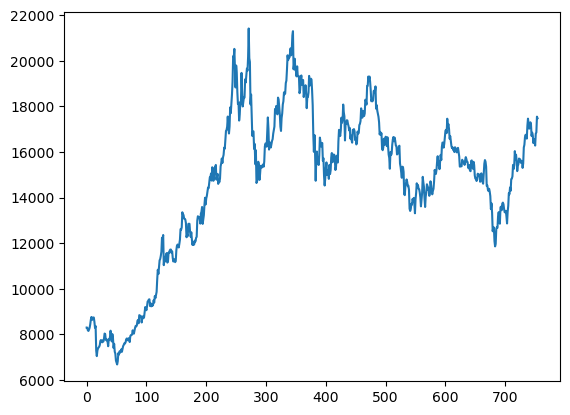

In [11]:
result['open'].astype(float).plot()